# K Nearest Neighbour Classifier
Assumption: Data points that are close to each other are similar (it does not differentiate between features). For classifying a new data point *k nearest neighbours* assigns the new label based on the preveiling label among the *k* closest data points from the training set.  
* neglects all the information from the rest of the dataset
* non-descriptive, as the decision is just based on the labels of the neighbours instead of an explicit function of the features
* requires a distance measure

In [2]:
from collections import Counter
import numpy as np
from matplotlib import pyplot as plt

## The Donut

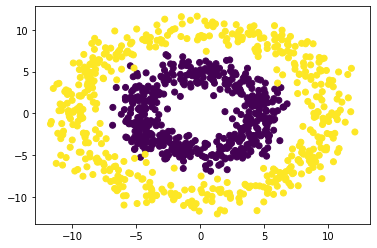

In [3]:
Nclass = 500
R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(Nclass) + R_inner
theta = 2*np.pi*np.random.random(Nclass)
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(Nclass) + R_outer
theta = 2*np.pi*np.random.random(Nclass)
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T

X_train = np.concatenate([ X_inner, X_outer ])
T_train = np.array([0]*(Nclass) + [1]*(Nclass)) # labels: first 50 are 0, last 50 are 1

plt.scatter(X_train[:,0], X_train[:,1], c=T_train)
plt.show()

## Implementation of the Model
The number of nearest neighbours as a hyperparameter:

In [5]:
k = 3

The `pick_label` method returns the majority vote of the nearest neighbours' labels. It deals with the potential issue of a par by recursively removing the label with the largest distanct until one unique winner can be determined.

In [6]:
def pick_label(labels):
    # assumes labels is sorted in ascending distance
    unique_labels, counts = np.unique(labels, return_counts=True)
    counts_sorted_indxs = counts.argsort()
    
    # check whether we have more than one winner
    if len(counts) <3 or ( counts[counts_sorted_indxs[-1]] != counts[counts_sorted_indxs[-2]] ):
        return unique_labels[counts_sorted_indxs[-1]]  # unique winner -> return it
    else:
        return pick_label(labels[:-1])  # try again without the farthest. Assumes labels is sorted

There is no real training of the model. In order to make a prediction, the model just needs the training data `X_train` and `T_train` in memory in order to determine the $k$ nearest neighbours and select the label.

The distance measure is implemented using the `numpy.linalg.norm()` method, which calculates for the distance vector $\mathbf{d}=\mathbf{v}-\mathbf{w}$ (with $\mathbf{v}=(v_1, v_2,..., v_n)$ and $\mathbf{w}=(w_1, w_2,..., w_n)$)
* `ord=1` the L1 norm: $\sum_i |d_i|$
* `ord=2` the L2 or (Euclidean) norm: $\sqrt{\sum_i d_i^2}$
* ...

In [9]:
def predict(X):
    """ X is N x D where each row is an example we wish to predict label for """
    
    num_test = X.shape[0]
    # lets make sure that the output type
    # matches the input type
    Y = np.zeros(num_test, dtype = T_train.dtype)
    
    # loop over all test rows
    for i in range(num_test):
        # calculate the distance of the i'th test sample to all the training samples
        # ord=1: L1 norm, ord=2: L2 norm etc
        dists = np.linalg.norm(X_train - X[i], ord=1, axis=1)
        # find the closest k training samples
        k_indxs = dists.argsort()[:k]
        
        Y[i] = pick_label(T_train[k_indxs])
    return Y

The classification rate:

In [11]:
np.mean(predict(X_train) == T_train)

0.992

# plot decision boundary

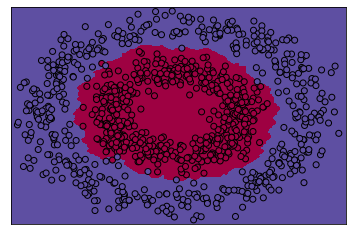

In [12]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, ) # figsize=(4, 3)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=T_train, edgecolors='k', cmap=plt.cm.Spectral)
# plt.xlabel('x')
# plt.ylabel('y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()